Question 2. In ‘oblique.py’, split the domain in x-direction to get two regions 
with different refractive indices n1 and n2 (see the figure). Put the 
emitEMwave boundary on the left side. For n1 > n2 (e.g. n1 = 2, n2 = 1), 
measure the critical angle. For n1 < n2, measure the Brewster’s angle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emitEMwave as ant
import emitEMwave_update as antu
import math as mt

In [2]:
import time as tm

In [13]:
def refraction(xmax, ymax, dx, dy, dt,f,D,smax,phi,apk,n1,n2,dur) :
    a=dt/dx;  b=dt/dy
    w=2.0*np.pi*f
    s=0
    
    cntr=0.6*ymax
    #upper=int(0.5*(ymax+D)/dy)
    #lower=int(0.5*(ymax-D)/dy)
    upper=int(D/dy)
    lower=int(0)
    
    x=np.arange(0,xmax+dx,dx)
    y=np.arange(0,ymax+dy,dy)
    Nh = int(xmax/dx/2)
    
    n = n2/n1 #relative refractive idnex
    
    X,Y=np.meshgrid(x,y)
    Ex=0*X; Ey=0*X; Ez=0*X
    Bx=0*X; By=0*X; Bz=0*X
    while s<smax:
        #Ey[:,0]= np.exp(-(y-cntr)**2/(0.2*ymax)**2)*np.sin(w*s*dt) # emission 
        #Ey[lower:upper,0]= np.sin(w*s*dt) # hole 
        ant.emitEMwave(s*dt,Ey[lower:upper,0],(dx,dy),'ovwrt','p',phi,0,f,0,0,6,(1.0,),dur,apk)
        ant.emitEMwave(s*dt,Ez[lower:upper,0],(dx,dy),'sum','s',phi,0,f,0,0,6,(1.0,),dur,apk)
        Bx[:-1,:-1] +=  -b*(Ez[1:,:-1]-Ez[:-1,:-1])
        By[1:-1,:-1] +=  a*(Ez[1:-1,1:]-Ez[1:-1,:-1])
        Bz[:-1,:-1]+= -a*(Ey[:-1,1:]-Ey[:-1,:-1]) + b*(Ex[1:,:-1]-Ex[:-1,:-1])

        Ex[1:-1,:Nh] +=  1.0*b*(Bz[1:-1,:Nh]-Bz[:-2,:Nh])
        Ex[1:-1,Nh:-1] +=  1.0*b*(Bz[1:-1,Nh:-1]-Bz[:-2,Nh:-1])/n**2

        Ey[:-1,1:Nh] += -1.0*a*(Bz[:-1,1:Nh]-Bz[:-1,:Nh-1])
        Ey[:-1,Nh:-1] += -1.00*a*(Bz[:-1,Nh:-1]-Bz[:-1,Nh-1:-2])/n**2

        Ez[1:-1,1:Nh]+=  1.0*(a*(By[1:-1,1:Nh]-By[1:-1,:Nh-1]) - b*(Bx[1:-1,1:Nh]-Bx[:-2,1:Nh]))
        Ez[1:-1,Nh:-1]+=  1.00*(a*(By[1:-1,Nh:-1]-By[1:-1,Nh-1:-2]) - b*(Bx[1:-1,Nh:-1]-Bx[:-2,Nh:-1]))/n**2
        s+=1
       
    extn=(0,xmax,0,ymax)
    plt.subplot(1,2,1);cs=plt.imshow(Ey,origin='lower',extent=extn); plt.colorbar(cs)
    plt.subplot(1,2,2);cs=plt.imshow(Ez,origin='lower',extent=extn); plt.colorbar(cs)
    plt.show()
    
    
    """
    if n1 > n2 :
        #print(np.max(abs(Ey[:,-1])))
        #print(np.max(abs(Ey[:,Nh+int(Nh/2):])))
        m1 = np.max(abs(Ey[:,Nh+3:]))
        m2 = np.max(abs(Ey[:,Nh:]))
        return abs(m1-m2)
    else :
        print(np.sum(Ey[:,Nh]**2))
        """
    return np.sum(Ey[:,Nh]**2)

Find critical angle (n1>n2)

n1 = np.sqrt(2)

n2 = 1

In [4]:
#set the variables
xmax=float(6)
ymax=float(16)
dx=float(0.02)
dy=float(0.02)
dt=float(0.01)
f=float(4)
D=float(7)
smax=int(700)
dsav = 50

In [5]:
n1 = np.sqrt(2)
n2 = 1

$\theta_{critical} = arcsin({{n2}\over{n1}})$

In [6]:
cri_phi = mt.asin(n2/n1)
cri_phi

0.7853981633974482

measure critical angle

In [10]:
inc_angle = np.arange(0.0,60.0,0.5)
R = inc_angle*0

In [12]:
s = 0
for i in range(len(inc_angle)) :
    phi = inc_angle[i]*np.pi/180.0
    R[i] = refraction(xmax, ymax, dx, dy, dt,f,D,800,phi,1,n1,n2)
    print(i)

0
1
2
3
4
5


KeyboardInterrupt: 

In [ ]:
plt.plot(inc_angle,R)
plt.xlabel('incident angle')
plt.ylabel('Reflectance')
plt.show()

In [ ]:
np.where(R - 0.5*(np.mean(R)+np.max(R)) < 0.1)

Before critical angle

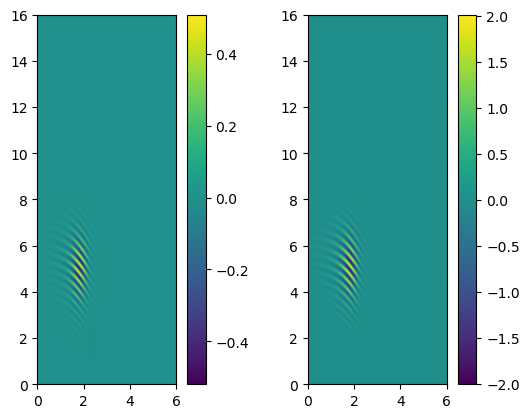

In [15]:
start = tm.time()
refraction(xmax, ymax, dx, dy, dt,f,D,300,0.7,1,n1,n2,0.3)
end = tm.time()

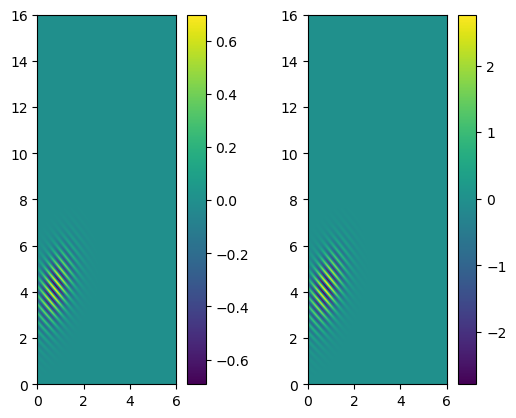

In [16]:
start = tm.time()
refraction(xmax, ymax, dx, dy, dt,f,D,300,0.7,1,n1,n2,1)
end = tm.time()

In [7]:
print(end-start)

58.35265374183655


At critical angle

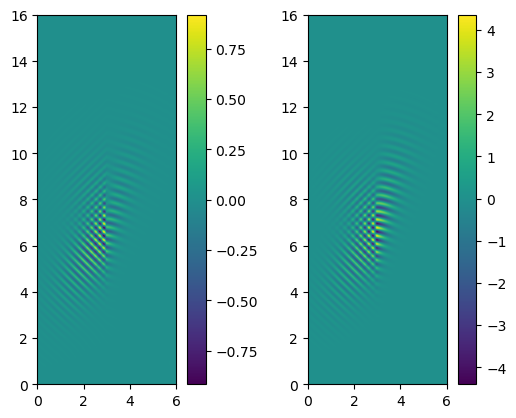

0.07270534217075314

In [10]:
refraction(xmax, ymax, dx, dy, dt,f,D,800,np.pi/4,1,n1,n2)

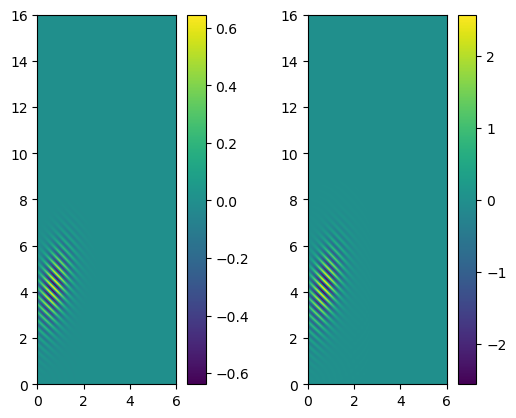

2.5561001939497095e-07

In [28]:
refraction(xmax, ymax, dx, dy, dt,4,7,300,np.pi/4,1,n1,n2,1)

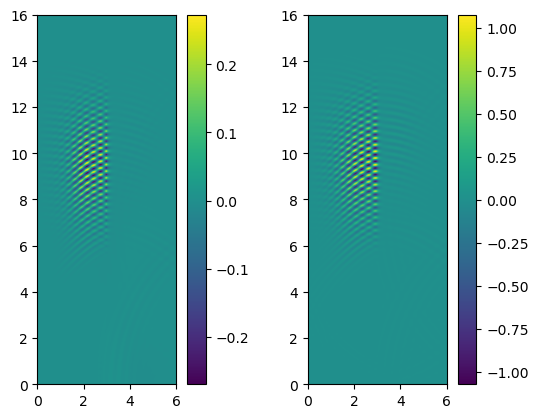

4.445651246786994

In [45]:
refraction(xmax, ymax, dx, dy, dt,4,7,800,np.pi/3,1,n1,n2,0.5)

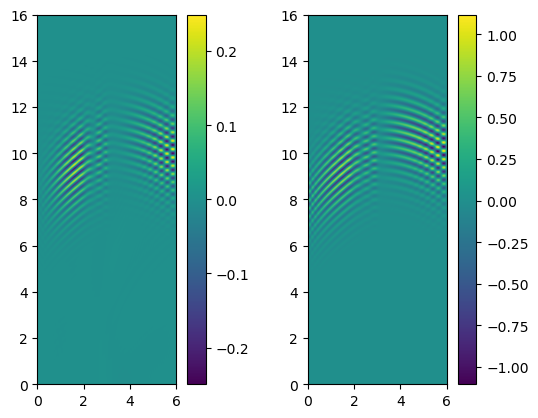

0.4197298161688464

In [46]:
refraction(xmax, ymax, dx, dy, dt,4,7,800,np.pi/4,1,n1,n2,0.3)

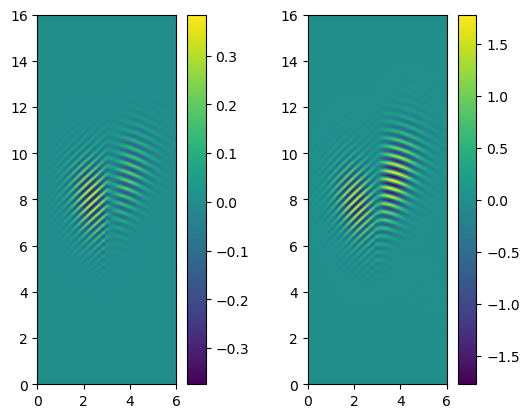

2.659860836800597

In [47]:
refraction(xmax, ymax, dx, dy, dt,4,7,800,np.pi/4,1,n1,n2,1)

After critical angle

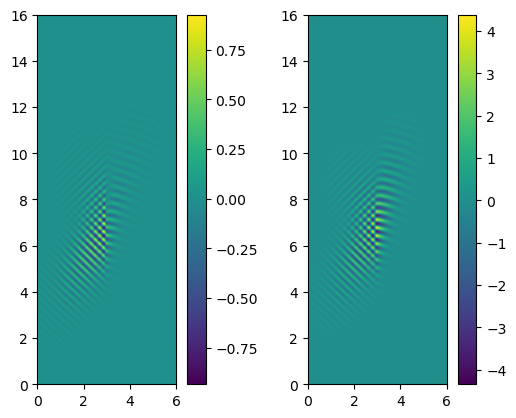

0.09295891457505362

In [12]:
refraction(xmax, ymax, dx, dy, dt,f,D,800,0.8,1,n1,n2)

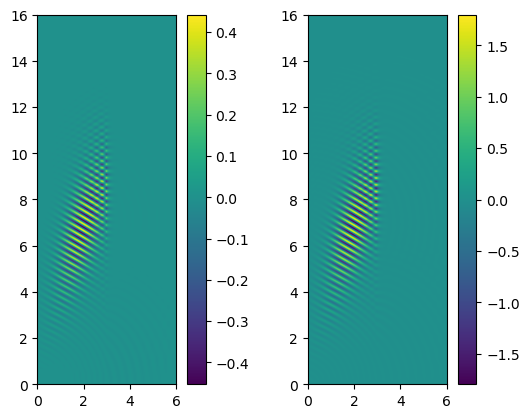

0.16291127632750432

In [13]:
refraction(xmax, ymax, dx, dy, dt,f,D,800,np.pi/3,1,n1,n2)

n1<n2 Find Brewster's angle

In [14]:
n1 = float(1.0)
n2 = float(2.0)
n = n2/n1

$\theta_{Brewster} = arctan({{n2}\over{n1}})$

In [15]:
bre_phi = mt.atan(n)
bre_phi

1.1071487177940904

Measure brewster angle

In [ ]:
inc_angle = np.arange(0.0,90.0,0.1)
R = inc_angle*0

In [ ]:
s = 0
for i in range(len(inc_angle)) :
    phi = inc_angle[i]*np.pi/180.0
    R[i] = refraction(xmax, ymax, dx, dy, dt,f,D,800,phi,1,n1,n2)
    print(i)

In [ ]:
plt.plot(inc_angle,R)
plt.xlabel('incident angle')
plt.ylabel('Reflectance')
plt.show()

In [ ]:
np.where(R == np.min(R))

Before Brester angle

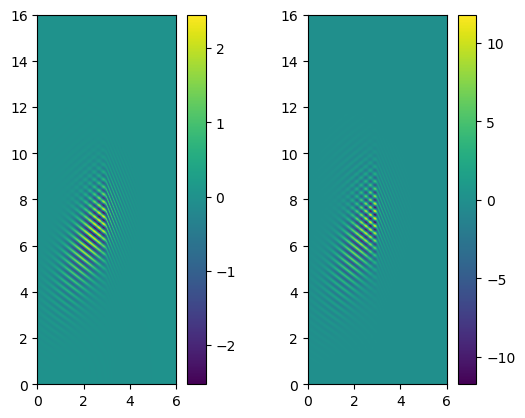

147.57763892837232


In [19]:
refraction(xmax, ymax, dx, dy, dt,f,D,800,0.9,4,n1,n2)

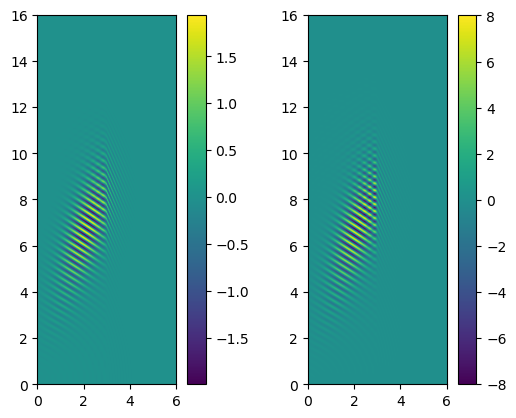

69.04020997665765


In [17]:
refraction(xmax, ymax, dx, dy, dt,f,D,800,1,4,n1,n2)

At Brester angle

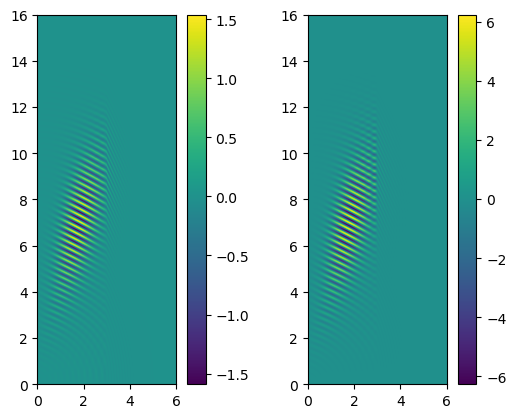

14.331901826992537


In [16]:
refraction(xmax, ymax, dx, dy, dt,f,D,800,bre_phi,4,n1,n2)

After Brester angle

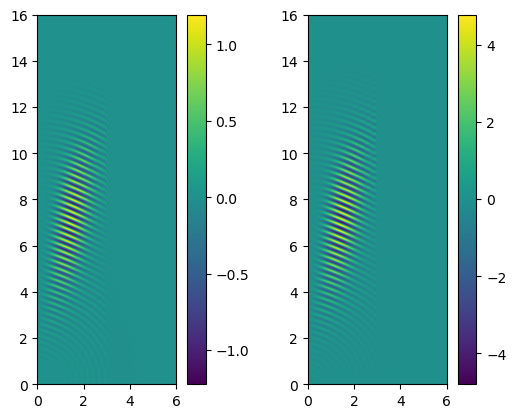

2.1106487304024477


In [18]:
refraction(xmax, ymax, dx, dy, dt,f,D,800,1.2,4,n1,n2)